# Supervised Machine Learning
## 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 02. Data

In [5]:
rc = pd.read_pickle(r"C:\Users\jmanc\OneDrive\Desktop\F1 Project\Data\Prepped Data\races.pkl")
fset = pd.read_pickle(r"C:\Users\jmanc\OneDrive\Desktop\F1 Project\Data\Prepped Data\race_lap_full.pkl")
fset.head(1)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,driverRef,code,forename,surname,nationality,lap_num,lap_pos,lap_time,lap_milli,status
0,22131,900,825,1,20,4,2.0,2,2,18.0,...,kevin_magnussen,MAG,Kevin,Magnussen,Danish,1,3,01:45.4,105402,Finished


In [6]:
rc.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

In [8]:
#creating new data frame to add years back to the full set
year = rc.drop(['round','circuitId','name','date','time','quali_date','quali_time','sprint_date','sprint_time'],axis=1)
year.head()

,raceId,year
0,1,2009
1,2,2009
2,3,2009
3,4,2009
4,5,2009


In [9]:
#adding year to full set and checking for completion
fset = fset.merge(year, on = 'raceId')
fset.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps',
       'raceTimeMilli', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'constructorRef', 'name', 'con_nat',
       'driverRef', 'code', 'forename', 'surname', 'nationality', 'lap_num',
       'lap_pos', 'lap_time', 'lap_milli', 'status', 'year'],
      dtype='object')

In [10]:
#exporting change
fset.to_pickle(r"C:\Users\jmanc\OneDrive\Desktop\F1 Project\Data\Prepped Data\race_lap_full.pkl")

In [19]:
#creating eras category for easy comparison.
year.dtypes

raceId    int64
year      int64
dtype: object

In [20]:
#eras by decade
fset.loc[fset['year'] < 1960, 'era'] = '1950s'
fset.loc[(fset['year'] >= 1960) & (fset['year'] < 1970), 'era'] = '1960s'
fset.loc[(fset['year'] >= 1970) & (fset['year'] < 1980), 'era'] = '1970s'
fset.loc[(fset['year'] >= 1980) & (fset['year'] < 1990), 'era'] = '1980s'
fset.loc[(fset['year'] >= 1990) & (fset['year'] < 2000), 'era'] = '1990s'
fset.loc[(fset['year'] >= 2000) & (fset['year'] < 2010), 'era'] = '2000s'
fset.loc[(fset['year'] >= 2010) & (fset['year'] < 2020), 'era'] = '2010s'
fset.loc[fset['year'] >= 2020, 'era'] = '2020s'

In [25]:
fset['era'].value_counts()

2010s    133269
2020s     71792
2000s      1358
Name: era, dtype: int64

In [24]:
fset.shape

(206419, 32)

In [29]:
fset['lap_milli'].mean()

97497.36973340632

## 03. Regression Prep

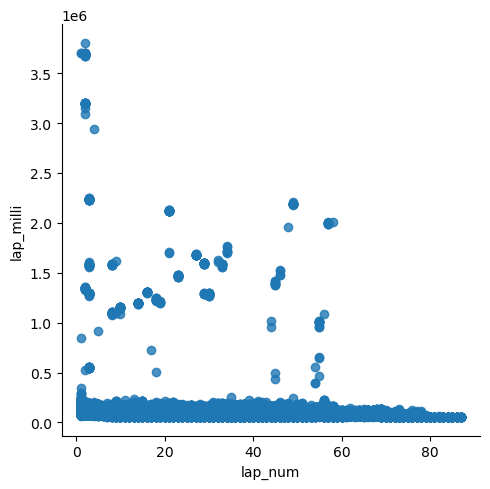

In [27]:
#scatterplot
sns.lmplot(x = 'lap_num', y = 'lap_milli', data = fset)

#### Hypothesis:
The earlier the lap, the higher the lap time.

In [31]:
X = fset['lap_num'].values.reshape(-1,1)
y = fset['lap_milli'].values.reshape(-1,1)

In [32]:
#splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

## 04. Regression Analysis

In [33]:
#creating Regression
reg = LinearRegression()

In [34]:
#training Regression
reg.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = reg.predict(X_test)

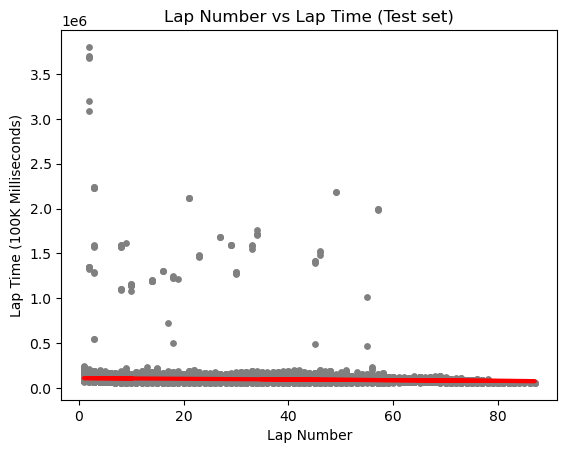

In [39]:
#plotting regression
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_pred, color='red', linewidth =3)
plot_test.title('Lap Number vs Lap Time (Test set)')
plot_test.xlabel('Lap Number')
plot_test.ylabel('Lap Time (100K Milliseconds)')
plot_test.show()

Looks like the model did not perform as well as expected.

In [41]:
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [42]:
print('Slope:', reg.coef_)
print('Mean Squared Error:', rmse)
print('R2 Score:', r2)

Slope: [[-388.48650481]]
Mean Squared Error: 4492628433.018519
R2 Score: 0.009482393152577595


In [43]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
data.head(30)

,Actual,Predicted
0,89276,105574.372738
1,98200,105574.372738
2,107339,109070.751281
3,104199,92365.831574
4,121338,109070.751281
5,99003,98193.129147
6,123212,105185.886233
7,107444,96250.696622
8,103769,107516.805262
9,102046,105185.886233


#### Thoughts:
Model could have performed better. Its likely that removing outliers might help, I was hesitant to remove the outliers because they represent actual lap times on real tracks. Also longer tracks will have longer lap times.